# Sampling Basics 

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://www.dropbox.com/s/3aoexl8vxyitmds/basic_material.py?dl=0
%run basic_material

%run hidden_function.py

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [2]:
Tf = 10
Ts_0 = 1  # sec, signal frequency
t0 = np.arange(0,Tf,Ts_0) # coarse sampling 
y0 = my_func(t0,1/Ts_0)

## We measure a signal every second and get this plot
### What would you predict the signal to be?

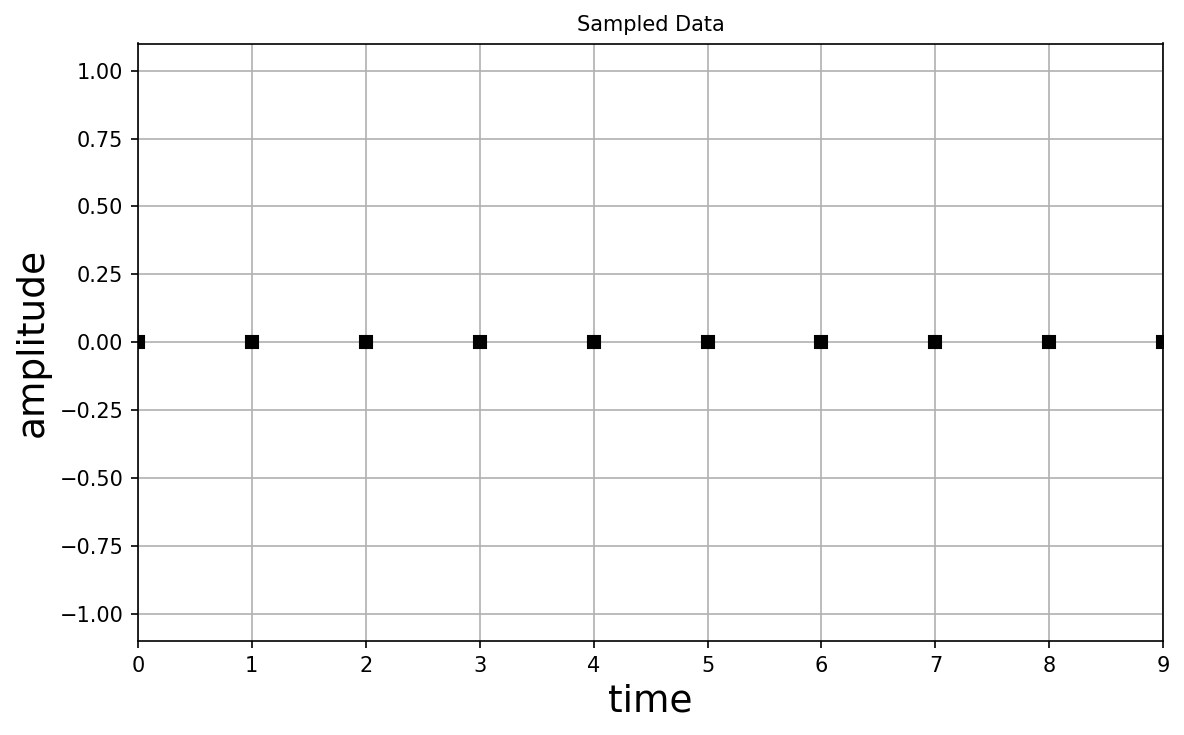

In [3]:
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(t0,y0,'ks')
ax.set_ylim(-1.1,1.1)
ax.set_xlim(0,Tf-1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Sampled Data')
plt.show()
fig.savefig('./figs/Sampling_001.png', bbox_inches='tight', dpi=300)

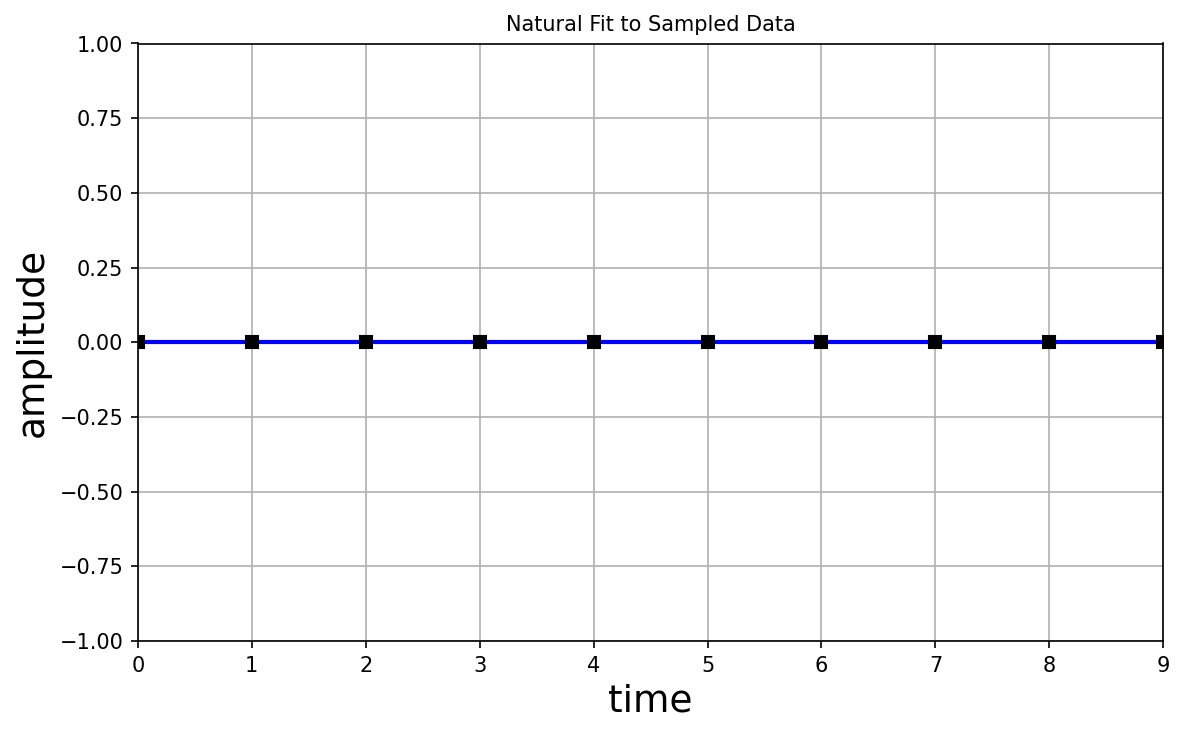

In [4]:
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(t0,y0,'b-')
ax.plot(t0,y0,'ks')
ax.set_ylim(-1,1)
ax.set_xlim(0,Tf-1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Natural Fit to Sampled Data')
plt.show()
fig.savefig('./figs/Sampling_002.png', bbox_inches='tight', dpi=300)

## Constant signal $y=0$ is a natural choice, but other options exist

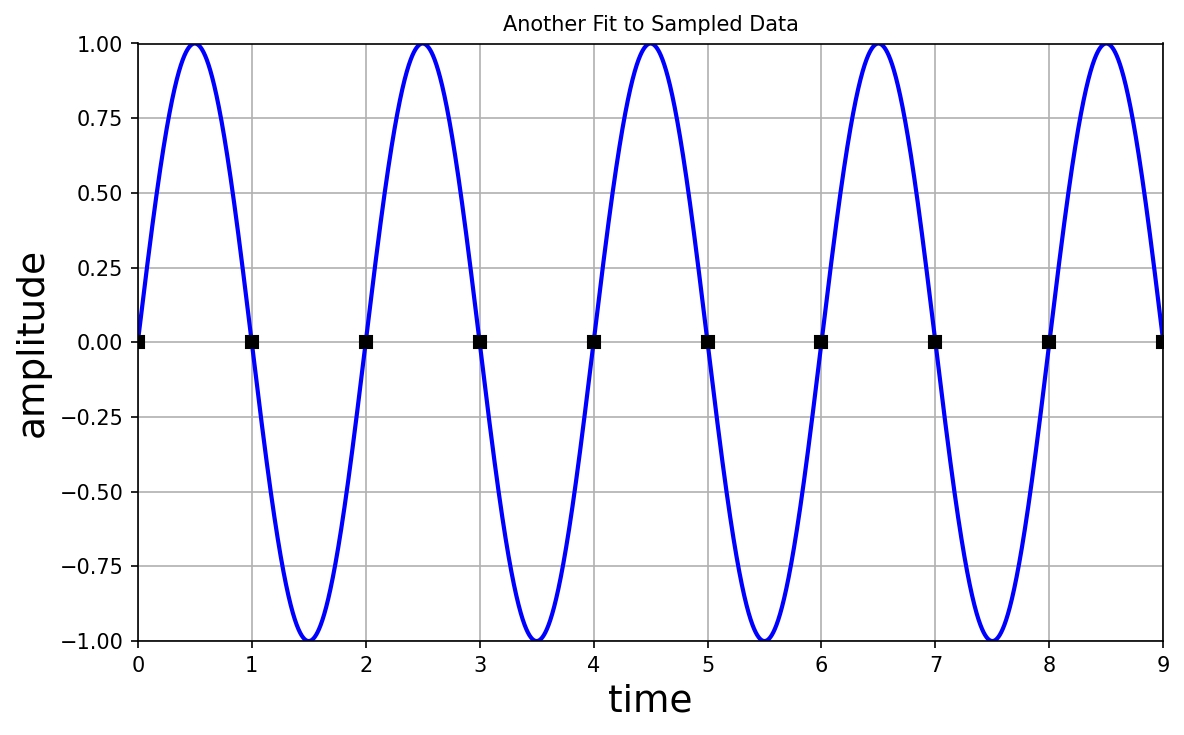

In [5]:
t1 = np.arange(0,Tf,1/1000) 
y_half = my_func(t1,1/Ts_0/2)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(t1,y_half,'b-')
ax.plot(t0,y0,'ks')
ax.set_ylim(-1,1)
ax.set_xlim(0,Tf-1)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('amplitude',fontsize=18)
plt.title('Another Fit to Sampled Data')
plt.show()
fig.savefig('./figs/Sampling_002a.png', bbox_inches='tight', dpi=300)

## Actually many options...

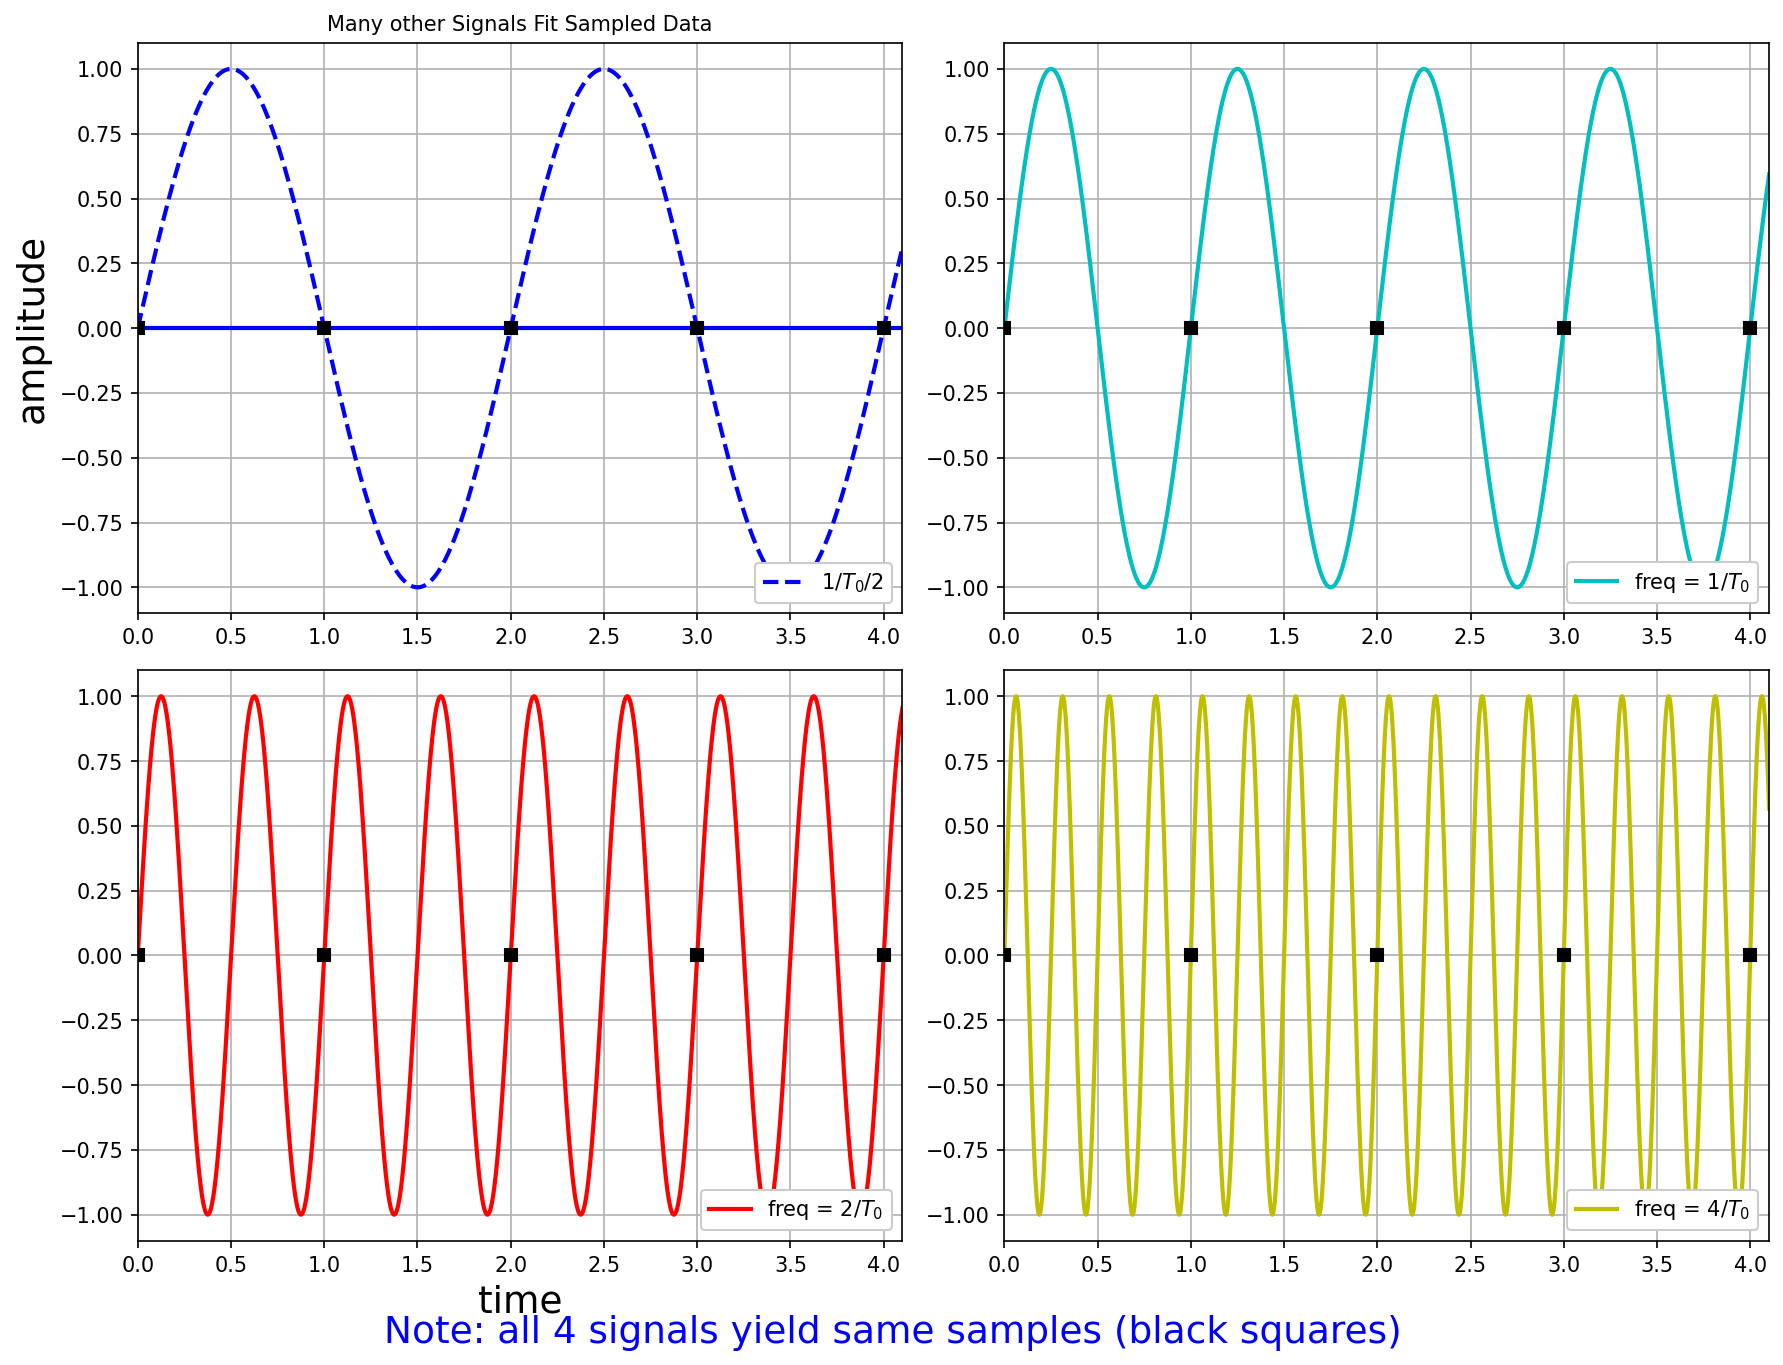

In [6]:
y1 = my_func(t1,Ts_0)
y2 = my_func(t1,2/Ts_0)
y4 = my_func(t1,4/Ts_0)

fig,ax = plt.subplots(2,2,figsize=(12,9))
ax[0,0].plot(t0,y0,'b-',)
ax[0,0].plot(t1,y_half,'b--',label='$1/T_0/2$')
ax[0,1].plot(t1,y1,'c-',label='freq = $1/T_0$')
ax[1,0].plot(t1,y2,'r-',label='freq = $2/T_0$')
ax[1,1].plot(t1,y4,'y-',label='freq = $4/T_0$')
ax[1,0].set_xlabel('time',fontsize=18)
ax[0,0].set_ylabel('amplitude',fontsize=18)
ax[0,0].set_title('Many other Signals Fit Sampled Data')
for kk in range(2):
    for jj in range(2):
        ax[kk,jj].plot(t0,y0,'ks')
        ax[kk,jj].set_ylim(-1.1,1.1)
        ax[kk,jj].set_xlim(0,4.1)
        ax[kk,jj].legend(facecolor='white', framealpha=1,loc=4)

fig.text(.5, 0, 'Note: all 4 signals yield same samples (black squares)', ha='center',size=BIGGER_SIZE,color='blue')
plt.show()
fig.savefig('./figs/Sampling_003.png', bbox_inches='tight', dpi=300)

## Look at various aliasing possbilities

## Can easily construct multiple signals that have the same sample points using 
$
\displaystyle \hat f_1 = f_1 - f_s \text{round}\left(\frac{f_1}{f_s},0\right)
$
### In this case both signals at $f_1$ and $\hat f_1$ will have the same sample points when sampled at $f_s$

In [7]:
# Signal Frequency list
fs = 0.5
f1 = 0.2
freqs = np.array([f1, fs - f1, fs + f1])
freqs_hat = freqs - fs*np.round(freqs/fs,0)

marker = ['o', 's']
colorz = ['r','b','g','c']

In [8]:
print('List of frequencies that are being compared')
for kk in range(3):
    print(f"f"+str(kk+1)+" = "+str(round(freqs[kk],1))+" and f"+str(kk+1)+"_hat = "+str(round(freqs_hat[kk],1)))
print('What does the negative frequency mean here?')
# time variables
Tf = 20   # final time
ts = np.arange(0,Tf,1/fs)       # slower sampling

f_approx_cts = 1000 # fast sampled so effectively continuous (best we can do on a computer)
t_cts = np.arange(0,Tf,1/f_approx_cts)    

List of frequencies that are being compared
f1 = 0.2 and f1_hat = 0.2
f2 = 0.3 and f2_hat = -0.2
f3 = 0.7 and f3_hat = 0.2
What does the negative frequency mean here?


In [9]:
def plot_all(fcn,txt=''):
    y_cts = fcn(2*np.pi*freqs.reshape(3,1)*t_cts)
    y_sampled = fcn(2*np.pi*freqs.reshape(3,1)*ts)
    y_aliased = fcn(2*np.pi*freqs_hat.reshape(3,1)*t_cts)

    fig,ax = plt.subplots(3,1,figsize=(12,6),sharex=True)
    for kk in range(3):
        ax[kk].plot(t_cts,y_cts[kk,:],'k-',label='cts with '+str(round(freqs[kk],1)))
        ax[kk].plot(ts,y_sampled[kk,:],marker=marker[kk%2], linestyle='None', c=colorz[kk],label='sampled at $f_s$',markersize=6)
        ax[kk].plot(t_cts,y_aliased[kk,:],'m--',linewidth=1,label='cts alias')
        ax[kk].legend(facecolor='white', framealpha=1, title=f'$\hat f_'+str(kk+1)+'$ = '+str(round(freqs_hat[kk],1)),bbox_to_anchor=(1, 1))
        ax[kk].set_ylim(-1.1,1.1)
        ax[kk].set_xlim(0,Tf)

    ax[2].set_xlabel('time',fontsize=18)
    ax[1].set_ylabel('amplitude',fontsize=18)
    ax[0].set_title('Alias mapping of all three signals to same frequency')
    fig.text(.5, -0.05, txt, ha='center',size=BIGGER_SIZE,color='blue')
    plt.show()

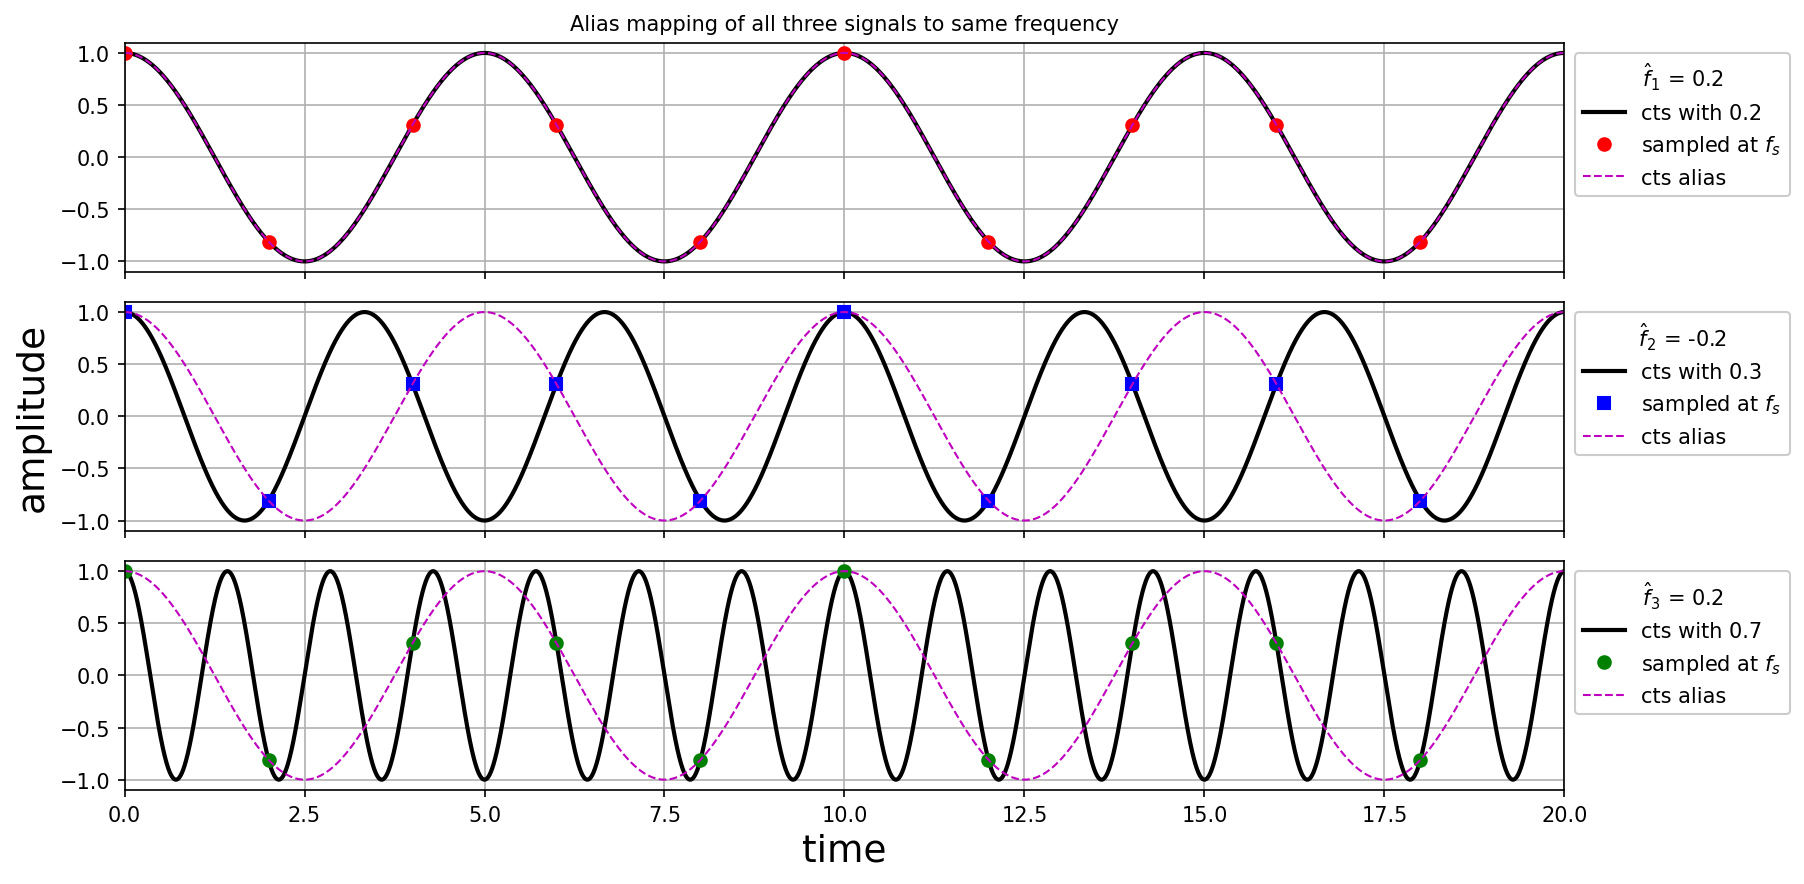

In [10]:
plot_all(lambda x : np.cos(x))
fig.savefig('./figs/Sampling_004.png', bbox_inches='tight', dpi=300)

# Repeat with sine
## Note phase difference associated with the negative aliased frequency for f2

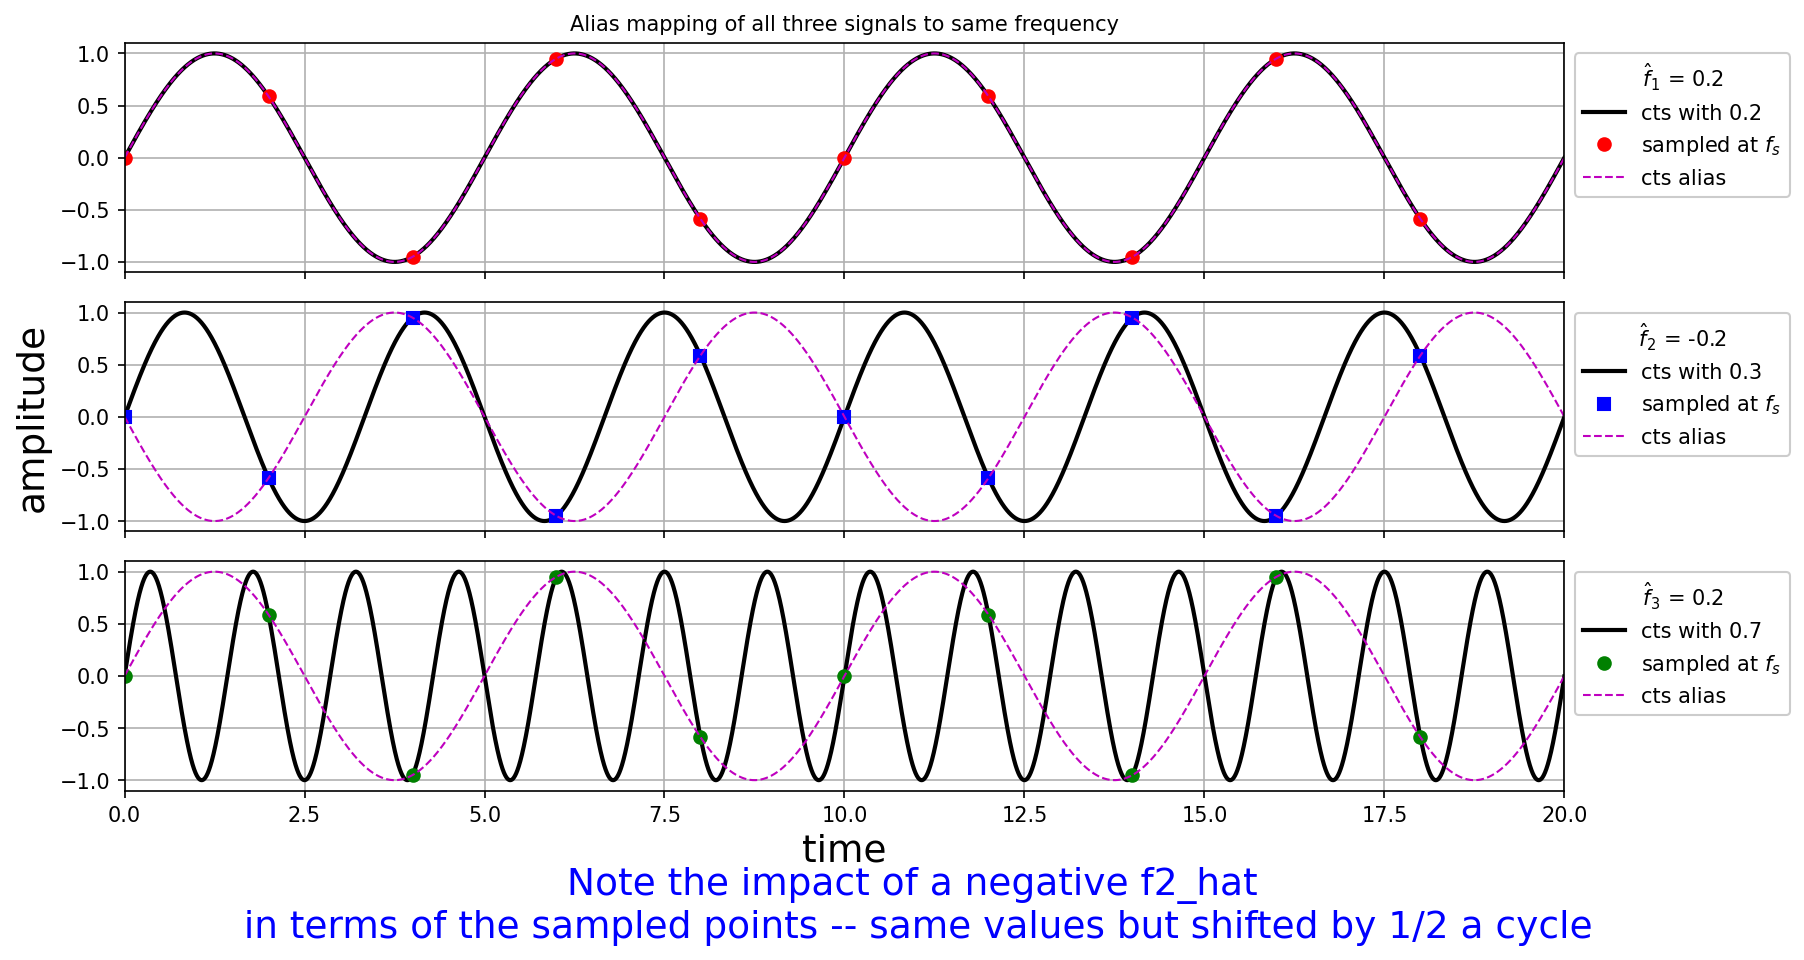

In [11]:
plot_all(lambda x : np.sin(x), "Note the impact of a negative f2_hat\n in terms of the sampled points -- same values but shifted by 1/2 a cycle")
fig.savefig('./figs/Sampling_004a.png', bbox_inches='tight', dpi=300)